# Var histórico

El valor en riesgo histórico (VaR), también conocido como simulación histórica o método histórico, se refiere a una forma particular de calcular el VaR. En este método se calcula el VaR directamente a partir de los rendimientos pasados. 

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

Nos creamos una cartera

In [3]:
symbols = ["AAPL", "META"]      
pesos = np.array([.20,.80])            
tickers = yf.Tickers(symbols)
data = tickers.history(start='2010-10-20',end='2015-10-20').Close.dropna()
returns = data.pct_change()[1:]

[*********************100%***********************]  2 of 2 completed


¿Qué más tenemos que hacer?

In [7]:
returns.describe()

,AAPL,META
count,859.000000,859.000000
mean,0.000668,0.001470
std,0.016573,0.027512
min,-0.123558,-0.116946
25%,-0.007701,-0.011727
50%,0.000398,0.000892
75%,0.010338,0.014022
max,0.081982,0.296115


In [27]:
pct_seg = 75
conf_level = 100 - pct_seg
percentiles =  np.percentile(returns, conf_level, axis=0)

In [28]:
rentabilidad = np.dot(percentiles, pesos)

In [29]:
investment = 1000000

In [30]:
valor_futuro = (1+rentabilidad)*investment

In [31]:
posible_perdida = rentabilidad*investment
posible_perdida

-10921.744667567147

In [35]:
def var_historico(returns, pct_seg, pesos,investment=1000):
    '''
    returns : es un df que tiene en las columnas los retornos de cada activo
    '''
    conf_level = 100 - pct_seg 
    percentiles = np.percentile(returns, conf_level, axis=0)
    rentabilidad = np.dot(percentiles, pesos)
    posible_perdida = rentabilidad*investment
    
    return posible_perdida

    

In [36]:
var_historico(returns, pct_seg=75, pesos=[0.2,0.8],investment=1000000)

-10921.744667567147

In [47]:
var_arr = []
for i in range(1,len(returns)+1):
    returns_aux = returns.iloc[:i,:]
    var_arr.append(var_historico(returns_aux, pct_seg=75, pesos=[0.2,0.8],investment=1000000))

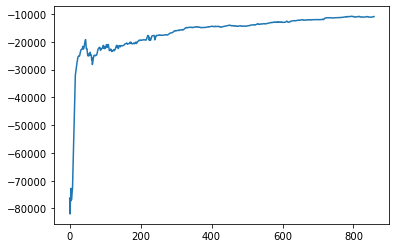

In [48]:
plt.plot(var_arr)